폐암수술환자의생존율예측하기

In [4]:
!pip install tensorflow
from tensorflow.keras.models import Sequent
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
#데이터 가져오기
!git clone https://github.com/taehojo/data.git

ImportError: cannot import name 'Sequent' from 'tensorflow.keras.models' (c:\Users\kosmo\anaconda3\Lib\site-packages\keras\_tf_keras\keras\models\__init__.py)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

#데이터 가져오기
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [5]:
#환자 데이터 불러오기
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv",delimiter=",")
x=Data_set[:,0:16] # 환자 진찰기록 x 지정
y = Data_set[:,16] #수술 1년 후 사망/생존 여부를 y로 지정

#딥러닝 모델 구조 결정
model = Sequential()
model.add(Dense(30,input_dim=16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


c:\Users\kosmo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(x,y,epochs=5,batch_size=16)

ValueError: You must call `compile()` before using the model.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('data/pima-indians-diabetes3.csv')


In [23]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.corr()
df["diabetes"].value_counts()
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
colormap = plt.cm.gist_heat #그래프 색상 구성
plt.figure(figsize=(12,12)) #그래프의 크기 

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Axes: >

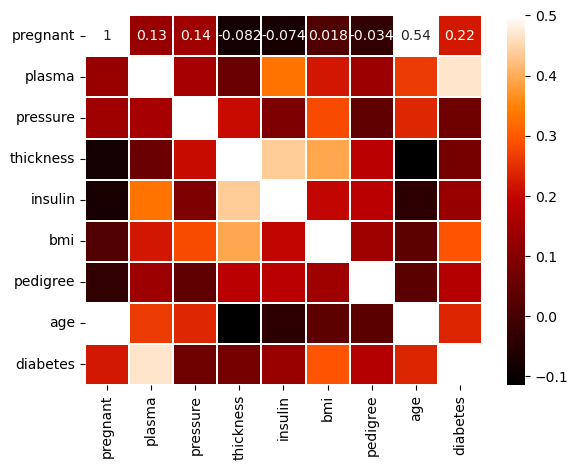

In [35]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,
            linecolor='white',annot=True)

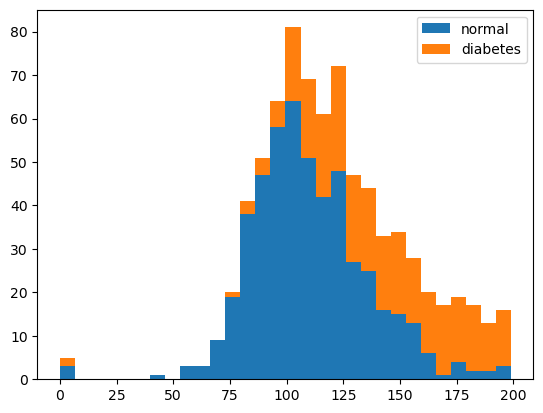

In [36]:
plt.hist(x=[df.plasma[df.diabetes==0],df.plasma[df.diabetes==1]],bins=30,
         histtype='barstacked',label=['normal','diabetes'])
plt.legend()

In [38]:
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu',name='Dense_1'))
model.add(Dense(8,activation='relu',name='Dense_2'))
model.add(Dense(1,activation='sigmoid',name='Dense_3'))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
df= pd.read_csv('data/pima-indians-diabetes3.csv')
X=df.iloc[:,0:8]
y=df.iloc[:,8]
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu',name='Dense1'))
model.add(Dense(8,activation='relu',name='Dense2'))
model.add(Dense(1,activation='sigmoid',name='Dense3'))



model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X,y,epochs=100,batch_size=5)

Epoch 1/100


c:\Users\kosmo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.4077 - loss: 57.8678
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.5893 - loss: 1.8250
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.5854 - loss: 1.0672
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6554 - loss: 0.8815
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.6376 - loss: 0.8876
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6571 - loss: 0.8512
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.6585 - loss: 0.8333
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6644 - loss: 0.8168
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6903 - loss: 0.7899
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6629 - loss: 0.9416
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.6462 - loss: 0.8745
Epoch 12/100
154/154 ━━━━━━━━━

Epoch 1/100


c:\Users\kosmo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 38.0748
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22.2052
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.9571
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5676
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.4268
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5964
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5296
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9078
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5453
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3340
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2107
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1388
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0968
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0722
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0577
Epoch 16/100
1/1 ━━━━━━━━━━

In [8]:
#[대출 승인 여부 데이터]

x_train = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning/binary_classification/loan_prediction-1/X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning/binary_classification/loan_prediction-1/Y_train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning/binary_classification/loan_prediction-1/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning/binary_classification/loan_prediction-1/Y_test.csv')

#labels = ['N', 'Y']

In [12]:
x_train 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural
380,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural
381,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural
382,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban


ValueError: could not convert string to float: 'LP001032'

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train['Gender'].replace({'Male':1,'Female':0},inplace=True)
x_train['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
x_train['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
x_train['Married'].replace({'Yes':1,'No':0},inplace=True)
x_train['Property_Area'] = 0

x = x_train.select_dtypes(include=[np.number])
y = y_train['Target'].replace({'Y': 1, 'N': 0}).values

model = Sequential()
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x,y,epochs=10,batch_size=5)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.2912 - loss: 2198.0930     
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.3133 - loss: 1997.4338
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.3083 - loss: 1654.4761
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.3034 - loss: 1149.7688
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.2980 - loss: 893.4205
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.2947 - loss: 623.2698
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.4483 - loss: 477.8776    
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.5290 - loss: 221.5007 
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5184 - loss: 168.2376
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5506 - loss: 101.4421


In [50]:
plt.figure(5,5)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

TypeError: Value after * must be an iterable, not int